In [1]:
# importing the necessary packages

# packages used for training
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd

# package used for POS-tagging
from spacy.en import English

# packages used for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# packages used for visualization
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# loads the text and labels
with open('../data/train/us.text') as f:
    eng_text = f.readlines()
    
with open('../data/train/us.labels') as f:
    eng_labels = f.readlines()

In [3]:
# asserts that the number of tweets and labels are equal
assert len(eng_text) == len(eng_labels)

In [4]:
# strips the tweets and labels of extra chars
eng_text = [tweet.strip() for tweet in eng_text]
eng_labels = [int(label.strip()) for label in eng_labels]

In [5]:
# shuffle the dataset with the same seed
np.random.seed(42)
np.random.shuffle(eng_text)
np.random.seed(42)
np.random.shuffle(eng_labels)

## Raw counts

In [89]:
# pipeline used to gather counts of all words in the dataset and vectorizes each document using CountVectorizer;
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('count', CountVectorizer()),
                 ('clf', LinearSVC())])

In [90]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.31627627  0.31218642  0.31344212  0.31273458  0.31639876]
Accuracy: 0.31 (+/- 0.00)


In [8]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[60881  9638  6407  3675  1955  2417  1854  2329  1971  1652  1180  1699
   2231  1297  1133  1159  1062  2040   951   935]
 [19257 12147  4216  1542  1378  1444  1142  1394   895   797   725   804
   1241   611   663   496   785   689   510   591]
 [ 9041  3272 23980   774  1835  1195  1430   672   577   561   639   712
    578   327   853  1239   805   560   585   802]
 [14807  2527  1432  2075   436   600   414   755   511   490   278   267
    645   360   265   242   201   314   220   228]
 [ 3749  1425  2489   343 10790   383   688   535   242   218   532   261
    336   190   279   816   283   184   447   236]
 [ 8542  2468  3017   625   574  1581   692   577   417   365   376   454
    787   263   430   363   535   490   240   316]
 [ 5513  1758  2937   444  1111   687  2484   540   392   310   422   517
   1403   195   406   660   398   233   345   363]
 [ 5545  1685  1181   586   774   441   445  3678   281   231   414   271
    582   223   255   309   196   540   334   191]


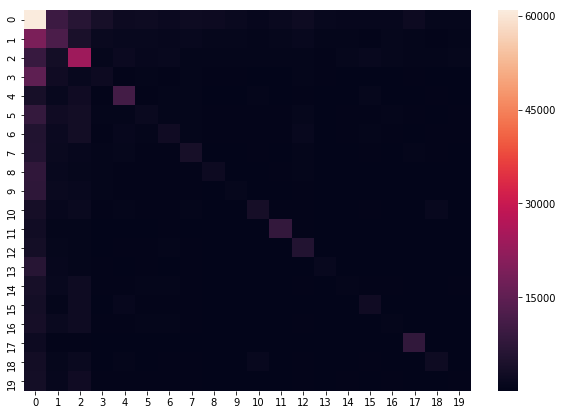

In [9]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [10]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.34      0.57      0.43    106466
          1       0.25      0.24      0.25     51327
          2       0.38      0.48      0.42     50437
          3       0.15      0.08      0.10     27067
          4       0.44      0.44      0.44     24426
          5       0.12      0.07      0.09     23112
          6       0.18      0.12      0.14     21118
          7       0.25      0.20      0.22     18162
          8       0.21      0.12      0.15     16846
          9       0.13      0.06      0.08     15985
         10       0.31      0.22      0.26     15947
         11       0.53      0.54      0.53     15182
         12       0.33      0.41      0.37     13717
         13       0.21      0.10      0.13     12839
         14       0.09      0.05      0.06     13359
         15       0.26      0.20      0.22     13264
         16       0.09      0.05      0.06     12958
         17       0.54      0.63      0.58   

## Feature normalization using tf-idf

In [11]:
# pipeline used to gather counts of all words in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC())])

In [12]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.33590651  0.33435652  0.33407445  0.33307156  0.33534943]
Accuracy: 0.33 (+/- 0.00)


In [13]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[64978 10184  6885  2875  2000  1886  1536  2102  1466  1129  1132  1695
   2155   832   673   884   647  2045   786   576]
 [20166 13407  4604  1216  1443  1161   981  1267   673   561   695   772
   1182   425   417   387   478   705   430   357]
 [ 9082  3324 26749   556  1863   914  1103   561   418   371   610   679
    511   203   547   974   481   532   483   476]
 [15936  2646  1541  1877   439   487   340   670   353   341   273   260
    608   235   167   192   110   295   166   131]
 [ 3685  1489  2718   257 11776   287   561   432   184   136   519   257
    297   134   174   676   161   172   365   146]
 [ 9073  2737  3320   489   621  1514   608   527   326   298   337   421
    805   192   299   283   393   478   207   184]
 [ 5720  1896  3316   351  1242   585  2528   489   319   244   420   506
   1459   139   293   581   285   212   307   226]
 [ 5825  1894  1332   463   839   356   388  3825   202   173   436   252
    571   161   168   258   111   531   268   109]


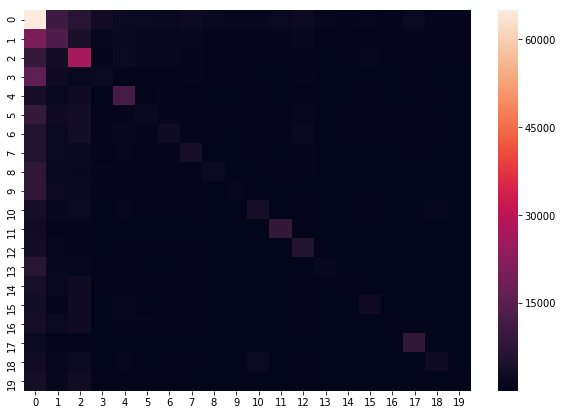

In [14]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [15]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.35      0.61      0.44    106466
          1       0.26      0.26      0.26     51327
          2       0.38      0.53      0.44     50437
          3       0.16      0.07      0.10     27067
          4       0.44      0.48      0.46     24426
          5       0.14      0.07      0.09     23112
          6       0.20      0.12      0.15     21118
          7       0.28      0.21      0.24     18162
          8       0.25      0.11      0.16     16846
          9       0.16      0.05      0.08     15985
         10       0.33      0.24      0.28     15947
         11       0.55      0.57      0.56     15182
         12       0.35      0.44      0.39     13717
         13       0.27      0.09      0.14     12839
         14       0.11      0.04      0.06     13359
         15       0.30      0.20      0.24     13264
         16       0.11      0.04      0.06     12958
         17       0.56      0.67      0.61   

## tf-idf and part-of-speech tagging

In [16]:
# loads the spaCy English parser
parser = English()

In [17]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [19]:
# pipeline used to gather counts of all words labeled with POS in the dataset normalized with tf-idf 
# and vectorizes each document using TfidfVectorizer; predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize)),
                 ('clf', LinearSVC())])

In [20]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.43274222  0.43230675  0.43261601  0.43294101  0.43384603]
Accuracy: 0.43 (+/- 0.00)


In [21]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[87470  4888  2410  2450   725  1003   654   799   690   738   452   608
   1119   345   310   385   257   690   261   212]
 [ 3302 21194  5698  3811  1848  2054  1589  1867  1330  1254   927  1191
    547   731   680   553   765   864   574   548]
 [ 1445  5077 28651  1300  2118  1460  1617   760   621   676   806   870
    190   329   807  1174   680   619   590   647]
 [ 2420  5797  2162  7145   652  1145   675  1223  1113  1113   381   477
    298   591   358   355   239   413   268   242]
 [  545  2285  2846   636 12286   466   792   637   336   242   606   371
    127   190   234   781   206   209   433   198]
 [ 1487  4776  3888  1860   792  2718  1025   815   628   698   445   599
    397   348   479   409   595   581   279   293]
 [  821  3162  3801  1017  1510  1035  3248   746   590   448   513   726
    771   222   429   699   400   280   359   341]
 [  829  3062  1590  1354  1040   652   649  4730   419   330   604   422
    255   262   286   347   183   603   378   167]


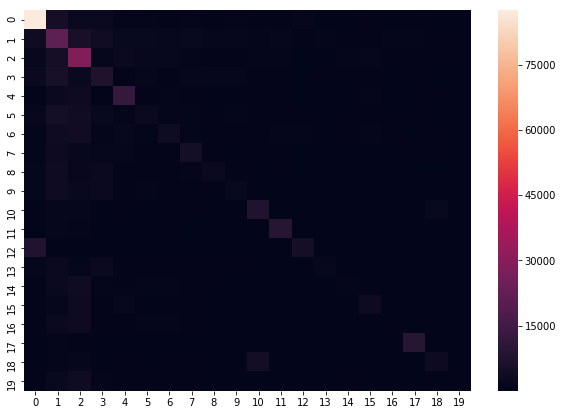

In [22]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [23]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.82      0.79    106466
          1       0.29      0.41      0.34     51327
          2       0.40      0.57      0.47     50437
          3       0.23      0.26      0.25     27067
          4       0.44      0.50      0.47     24426
          5       0.16      0.12      0.14     23112
          6       0.20      0.15      0.18     21118
          7       0.28      0.26      0.27     18162
          8       0.24      0.16      0.19     16846
          9       0.19      0.12      0.15     15985
         10       0.41      0.48      0.44     15947
         11       0.53      0.61      0.57     15182
         12       0.48      0.35      0.41     13717
         13       0.25      0.12      0.16     12839
         14       0.12      0.06      0.08     13359
         15       0.30      0.23      0.26     13264
         16       0.12      0.05      0.07     12958
         17       0.59      0.71      0.65   

## tf-idf and bi-grams

In [24]:
# pipeline used to gather counts of bi-grams in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                 ('clf', LinearSVC())])

In [25]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.34987712  0.34700184  0.34927078  0.34689132  0.34874138]
Accuracy: 0.35 (+/- 0.00)


In [26]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[61689 11211  6090  4679  1789  2495  1616  2178  1630  1665  1212  1502
   2126   886   737   845   671  2004   889   552]
 [17771 15515  4309  1570  1286  1519  1068  1223   668   663   762   696
   1111   373   437   326   547   709   447   327]
 [ 7337  3342 28068   645  1677  1164  1246   524   370   432   638   615
    502   214   643   951   528   527   517   497]
 [14215  2907  1316  2859   415   672   359   715   474   529   286   238
    605   348   190   184   137   279   199   140]
 [ 3011  1516  2425   302 12625   339   618   458   181   163   533   218
    275   117   207   643   154   159   337   145]
 [ 7746  2938  3123   722   561  2215   738   538   373   381   354   381
    775   202   413   263   466   485   223   215]
 [ 4818  2010  3248   462  1211   844  2820   531   338   250   440   479
   1449   163   340   535   343   202   337   298]
 [ 4992  2052  1171   670   776   509   465  4035   261   197   455   236
    535   157   218   248   170   557   332   126]


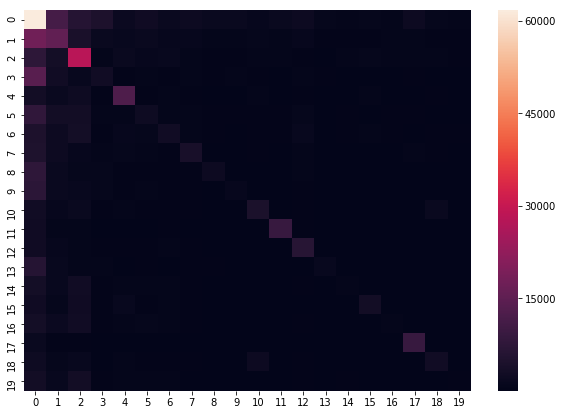

In [27]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [28]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.37      0.58      0.45    106466
          1       0.28      0.30      0.29     51327
          2       0.41      0.56      0.47     50437
          3       0.17      0.11      0.13     27067
          4       0.48      0.52      0.50     24426
          5       0.15      0.10      0.12     23112
          6       0.20      0.13      0.16     21118
          7       0.28      0.22      0.25     18162
          8       0.26      0.13      0.17     16846
          9       0.17      0.07      0.10     15985
         10       0.34      0.29      0.31     15947
         11       0.58      0.59      0.59     15182
         12       0.37      0.46      0.41     13717
         13       0.27      0.10      0.15     12839
         14       0.12      0.05      0.07     13359
         15       0.34      0.22      0.27     13264
         16       0.13      0.05      0.07     12958
         17       0.58      0.71      0.64   

## tf-idf, bi-grams and part-of-speech tagging

In [29]:
# loads the spaCy English parser
parser = English()

In [30]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [32]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', LinearSVC())])

In [33]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.45108757  0.44974505  0.45138195  0.45056503  0.45258251]
Accuracy: 0.45 (+/- 0.00)


In [34]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[87565  4808  2065  2605   641  1103   650   763   812   935   356   542
   1119   478   308   315   280   659   250   212]
 [ 2979 22640  5021  3858  1742  2340  1678  1691  1430  1417   744  1009
    278   716   715   477   799   775   483   535]
 [ 1294  4897 29591  1269  1943  1559  1702   706   595   704   598   752
    125   300   857  1055   682   573   510   725]
 [ 2212  5537  1768  7507   599  1239   704  1240  1340  1467   327   414
    143   812   368   270   235   382   240   263]
 [  494  2195  2475   594 13219   422   829   611   329   236   507   293
     77   186   261   742   195   197   359   205]
 [ 1413  4800  3542  1826   736  3244  1137   783   702   806   349   502
    237   351   557   332   669   538   259   329]
 [  667  3229  3511  1076  1453  1236  3696   759   608   508   391   674
    465   257   516   641   476   249   282   424]
 [  775  3099  1336  1478   994   732   718  4920   486   354   456   390
    158   281   315   306   202   585   350   227]


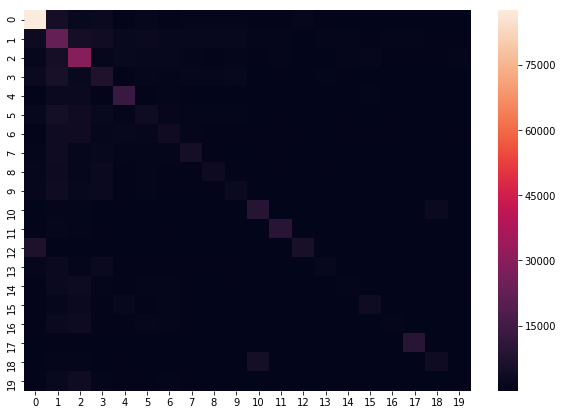

In [35]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [36]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.82      0.80    106466
          1       0.32      0.44      0.37     51327
          2       0.43      0.59      0.50     50437
          3       0.24      0.28      0.26     27067
          4       0.47      0.54      0.50     24426
          5       0.18      0.14      0.16     23112
          6       0.21      0.18      0.19     21118
          7       0.30      0.27      0.28     18162
          8       0.25      0.18      0.21     16846
          9       0.20      0.15      0.17     15985
         10       0.46      0.54      0.49     15947
         11       0.57      0.62      0.59     15182
         12       0.63      0.42      0.50     13717
         13       0.23      0.12      0.16     12839
         14       0.14      0.08      0.10     13359
         15       0.34      0.24      0.28     13264
         16       0.13      0.06      0.08     12958
         17       0.62      0.73      0.67   

## tf-idf, tri-grams and part-of-speech tagging

In [91]:
# loads the spaCy English parser
parser = English()

In [92]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [93]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,3))),
                 ('clf', LinearSVC())])

In [94]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.45438137  0.45271262  0.45261601  0.45270684  0.45555057]
Accuracy: 0.45 (+/- 0.00)


In [95]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[87902  4919  1934  2596   700  1049   619   749   772   899   403   578
   1051   373   306   257   226   717   247   169]
 [ 3304 23153  4910  3885  1803  2070  1576  1585  1335  1336   837  1028
    400   605   585   432   717   830   492   444]
 [ 1509  4901 29856  1239  2053  1383  1629   646   570   669   683   779
    164   294   815   959   569   607   505   607]
 [ 2496  5607  1668  7713   619  1153   655  1139  1258  1381   378   421
    190   723   337   258   203   412   237   219]
 [  523  2205  2385   642 13434   372   800   556   334   222   574   322
    115   176   210   665   170   204   353   164]
 [ 1603  4816  3410  1912   775  3241  1119   736   648   805   405   522
    311   291   515   306   613   552   254   278]
 [  767  3268  3414  1091  1532  1184  3609   731   590   482   445   727
    611   236   476   597   421   273   298   366]
 [  916  3068  1289  1477  1045   676   711  4817   469   394   536   416
    208   259   277   294   185   606   335   184]


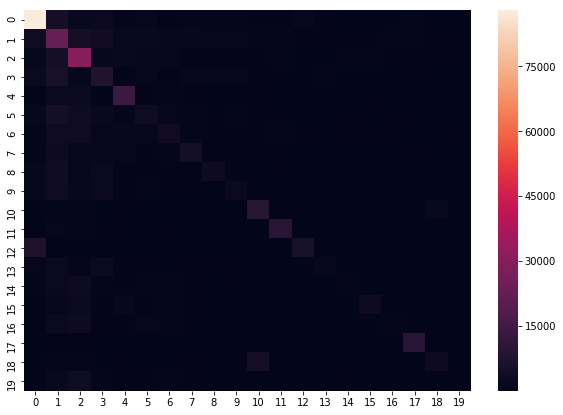

In [96]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [97]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.83      0.80    106466
          1       0.32      0.45      0.37     51327
          2       0.44      0.59      0.51     50437
          3       0.24      0.28      0.26     27067
          4       0.47      0.55      0.50     24426
          5       0.19      0.14      0.16     23112
          6       0.22      0.17      0.19     21118
          7       0.31      0.27      0.29     18162
          8       0.25      0.18      0.21     16846
          9       0.21      0.15      0.17     15985
         10       0.44      0.56      0.49     15947
         11       0.56      0.62      0.59     15182
         12       0.57      0.40      0.47     13717
         13       0.25      0.12      0.16     12839
         14       0.15      0.07      0.10     13359
         15       0.36      0.23      0.28     13264
         16       0.14      0.06      0.08     12958
         17       0.61      0.74      0.67   

## tf-idf, bi-grams, part-of-speech tagging and dimensionality reduction

### with n = 100

In [69]:
from sklearn.decomposition import TruncatedSVD

In [70]:
test_set_size = int(len(eng_text) * 0.1)
eng_text_10 = eng_text[:test_set_size]
eng_labels_10 = eng_labels[:test_set_size]

In [71]:
assert len(eng_text_10) == len(eng_labels_10)

In [72]:
# loads the spaCy English parser
parser = English()

In [73]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [74]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('svd', TruncatedSVD(n_components=100)),
                 ('clf', LinearSVC())])

In [75]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text_10, eng_labels_10, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.31702843  0.31297788  0.30797471  0.31564987  0.31563904]
Accuracy: 0.31 (+/- 0.01)


In [76]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text_10,eng_labels_10,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels_10,y_pred)
print(conf_mat)

[[9361  592  389   70   74   28    1   14    2    5   83   35   56    0
     0    0    0   80    9    0]
 [2189 1355  841   82  184   31    3   38    3    8  150   48  108    0
     0    0    1   73   14    0]
 [1331  727 2292   47  170   29    9   10    7    7  176   40   47    0
     2    0    2   53   19    0]
 [1397  479  329  166   82   29    1   24    6   11   47   32   43    0
     0    0    0   34    4    0]
 [ 719  385  584   33  479    9    1    6    5    1  146   27   28    0
     0    0    0   26   15    0]
 [ 933  532  438   46   92   58    1   10    3   19   55   31   64    0
     0    1    3   40   11    0]
 [ 706  468  428   42   97   27    5   14    5    6   56   50  113    0
     0    0    1   29   10    0]
 [ 672  386  358   53   87   10    5   73    2    5   92   31   43    0
     1    0    0   37    4    0]
 [ 826  318  204   70   46   15    4   15    4    6   25   25   57    0
     0    0    0   22    2    0]
 [ 826  259  233   66   40   35    0    4    1   17   4

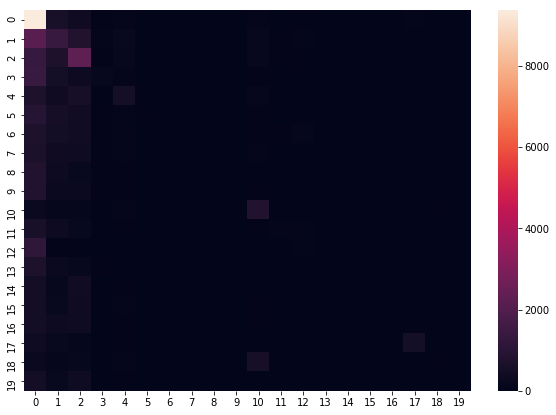

In [77]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels_10)], columns = [i for i in set(eng_labels_10)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [78]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels_10, y_pred))

             precision    recall  f1-score   support

          0       0.39      0.87      0.54     10799
          1       0.18      0.26      0.22      5128
          2       0.27      0.46      0.34      4968
          3       0.19      0.06      0.09      2684
          4       0.26      0.19      0.22      2464
          5       0.15      0.02      0.04      2337
          6       0.10      0.00      0.00      2057
          7       0.27      0.04      0.07      1859
          8       0.07      0.00      0.00      1639
          9       0.14      0.01      0.02      1595
         10       0.32      0.52      0.40      1555
         11       0.18      0.07      0.10      1498
         12       0.10      0.07      0.08      1401
         13       0.00      0.00      0.00      1305
         14       0.11      0.00      0.00      1284
         15       0.00      0.00      0.00      1316
         16       0.13      0.00      0.00      1327
         17       0.47      0.39      0.43   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### n = 500

In [79]:
from sklearn.decomposition import TruncatedSVD

In [80]:
test_set_size = int(len(eng_text) * 0.1)
eng_text_10 = eng_text[:test_set_size]
eng_labels_10 = eng_labels[:test_set_size]

In [81]:
assert len(eng_text_10) == len(eng_labels_10)

In [82]:
# loads the spaCy English parser
parser = English()

In [83]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [84]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('svd', TruncatedSVD(n_components=500)),
                 ('clf', LinearSVC())])

In [85]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text_10, eng_labels_10, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.37236319  0.36751962  0.37568835  0.37308713  0.37433646]
Accuracy: 0.37 (+/- 0.01)


In [86]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text_10,eng_labels_10,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels_10,y_pred)
print(conf_mat)

[[8899  700  353  219  110   49   22   35   20   25   67   98   75    2
     5    9    1   86   24    0]
 [ 863 2121  777  243  270   78   54   83   55   22  163  140   86    2
    10   12   10   94   44    1]
 [ 466  834 2623  140  275   64   55   31   26   21  136  102   45    0
    10   28    7   66   38    1]
 [ 622  644  329  550  106   53   29   46   38   41   50   61   39    1
     5    9    4   38   17    2]
 [ 199  368  445   91  987   16   29   19   18    3  126   52   30    0
     7   12    2   21   36    3]
 [ 414  642  438  152  128  120   42   29   35   23   59  108   56    0
     3    8    9   50   18    3]
 [ 263  538  440   98  169   44   58   35   37    9   65  101  108    1
     4   19    7   38   21    2]
 [ 253  452  291  130  166   26   40  133   19   15   92   79   39    1
     7   16    4   70   25    1]
 [ 391  431  174  199   86   28   22   25   75   18   38   74   32    1
     6    6    1   27    5    0]
 [ 388  390  222  203   74   60   21   15   19   53   3

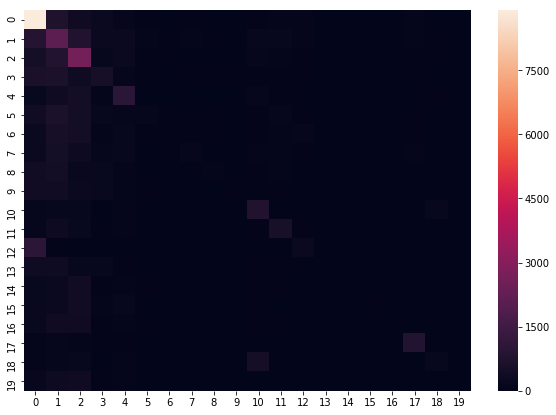

In [87]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels_10)], columns = [i for i in set(eng_labels_10)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [88]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels_10, y_pred))

             precision    recall  f1-score   support

          0       0.58      0.82      0.68     10799
          1       0.23      0.41      0.29      5128
          2       0.31      0.53      0.39      4968
          3       0.21      0.20      0.21      2684
          4       0.31      0.40      0.35      2464
          5       0.16      0.05      0.08      2337
          6       0.10      0.03      0.04      2057
          7       0.22      0.07      0.11      1859
          8       0.16      0.05      0.07      1639
          9       0.17      0.03      0.06      1595
         10       0.33      0.51      0.40      1555
         11       0.33      0.37      0.35      1498
         12       0.26      0.17      0.21      1401
         13       0.00      0.00      0.00      1305
         14       0.08      0.01      0.01      1284
         15       0.21      0.03      0.06      1316
         16       0.18      0.01      0.02      1327
         17       0.55      0.63      0.59   

## tf-idf, bi-grams and part-of-speech tagging with balanced dataset

In [37]:
# puts the English text and labels data into a pandas DataFrame
eng_data_df = pd.DataFrame([eng_text, eng_labels]).transpose()
eng_data_df.columns = (['text', 'label'])

In [38]:
# collects a random sample of each category based on the frequency of the least common set
# e.g. category 19 has 12197 items, so a sample of 12197 tweets from each category
eng_data_balanced = pd.concat([eng_data_df[eng_data_df.label == i].sample(12197) for i in range(0,20)])
eng_data_balanced

,text,label
49847,Love is all you need # ️ @ Downtown Miami,0
255815,My dreams have come true! It's a giant #kirby ...,0
208768,These are a few of my favorite things ️ ️ joan...,0
6505,This guy. This place. ️ ️ ️ #movember #palodur...,0
93077,St. Louis Ribs at charlieandjakesbeachside -- ...,0
315923,Farewell drink with the Zeno group. I'll miss ...,0
33228,Feels so good to be back (and this time to sta...,0
83512,That's my spot dood....lol ️️ #socialmedia #so...,0
466450,Because I ️ this. #mondaymotivation #god #thed...,0
290952,An afternoon date with a very pretty girl ️ #s...,0


In [39]:
# takes the data from the eng_data_balanced DataFrame and converts the text/labels into Python arrays
eng_text_balanced = eng_data_balanced['text'].tolist()
eng_labels_balanced = eng_data_balanced['label'].tolist()

In [40]:
# asserts that the number of tweets and labels are equal
assert len(eng_text_balanced) == len(eng_labels_balanced)

In [41]:
# shuffle the dataset with the same seed
np.random.seed(42)
np.random.shuffle(eng_text_balanced)
np.random.seed(42)
np.random.shuffle(eng_labels_balanced)

In [42]:
# loads the spaCy English parser
parser = English()

In [43]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [45]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', LinearSVC())])

In [46]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text_balanced, eng_labels_balanced, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.34512295  0.35053279  0.34649446  0.34610496  0.34702747]
Accuracy: 0.35 (+/- 0.00)


In [47]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
y_pred = cross_val_predict(pipe,eng_text_balanced,eng_labels_balanced,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels_balanced,y_pred)
print(conf_mat)

[[8112  224   89  315   83  159  104  143  215  281   87  110 1380  243
   119  115  111  144   76   87]
 [ 134 2248  519  958  435  674  522  724  728  894  347  455  122  693
   552  330  733  299  313  517]
 [  39  411 3917  320  503  462  549  308  343  435  298  334   49  276
   857  874  711  229  352  930]
 [ 157  853  274 2551  242  617  348  778 1142 1357  237  281   85 1217
   450  325  365  260  255  403]
 [  31  350  470  239 5939  207  447  450  262  278  353  275   73  254
   388  888  314  160  420  399]
 [  91  801  661  806  325 1514  645  626  646  882  258  475  184  589
   821  428 1065  429  267  684]
 [  45  549  623  436  709  603 2029  568  488  510  340  610  368  412
   785  884  797  238  397  806]
 [  48  605  272  754  581  442  494 3608  508  498  440  436  131  559
   501  475  420  533  459  433]
 [ 110  743  279 1470  283  538  476  682 2787  869  254  490  122  956
   448  427  386  247  242  388]
 [ 117  689  414 1343  293  666  416  503  692 3003  25

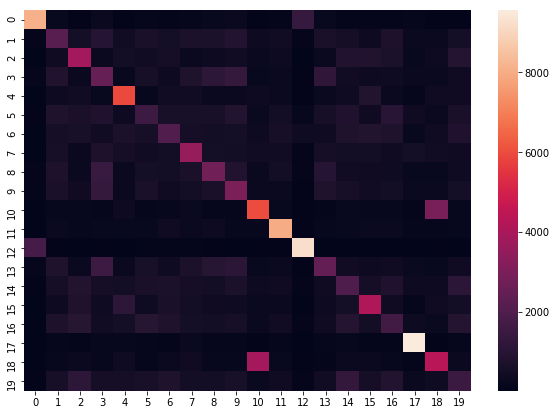

In [48]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [49]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels_balanced, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.67      0.70     12197
          1       0.20      0.18      0.19     12197
          2       0.31      0.32      0.32     12197
          3       0.19      0.21      0.20     12197
          4       0.44      0.49      0.46     12197
          5       0.15      0.12      0.14     12197
          6       0.19      0.17      0.18     12197
          7       0.29      0.30      0.29     12197
          8       0.24      0.23      0.23     12197
          9       0.23      0.25      0.24     12197
         10       0.41      0.49      0.45     12197
         11       0.56      0.66      0.60     12197
         12       0.74      0.76      0.75     12197
         13       0.23      0.20      0.22     12197
         14       0.17      0.16      0.17     12197
         15       0.34      0.34      0.34     12197
         16       0.16      0.14      0.15     12197
         17       0.67      0.78      0.72   